In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Web Extension extension is not supported and will be removed
  warn(msg)


<Figure size 1000x1300 with 0 Axes>

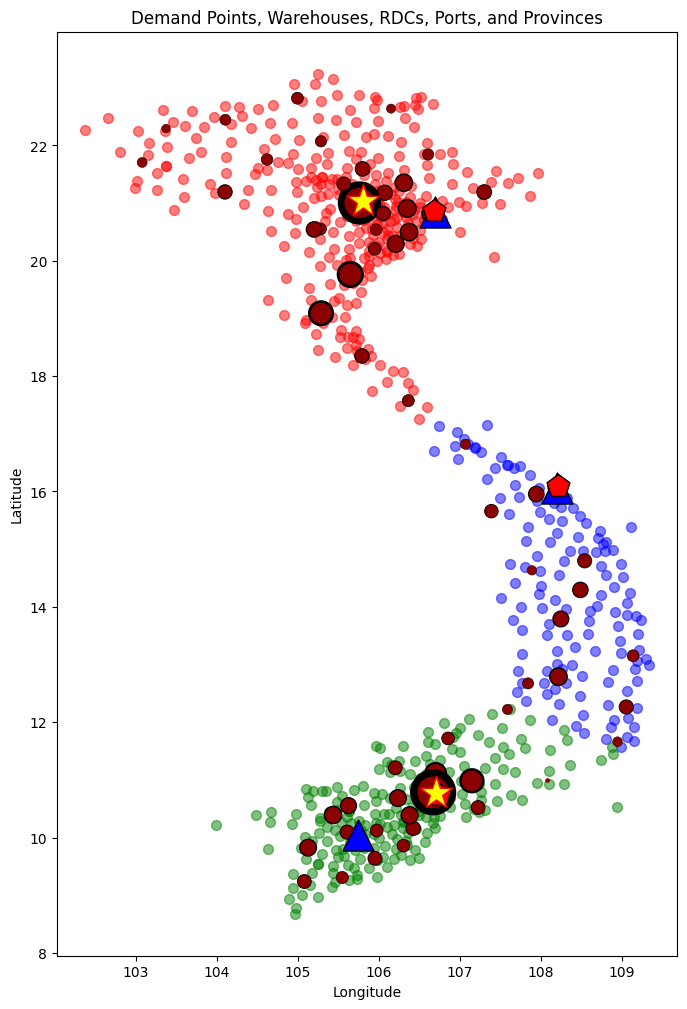

In [8]:
provinces_data = pd.read_excel('Provinces.xlsx')
data = pd.read_excel('Location, Weight population.xlsx')
warehouses = {'HCM': (10.776889, 106.700806), 'Hanoi': (21.028511, 105.804817)}
rdcs = {'Hai Phong': (20.844912, 106.688084), 'Da Nang': (16.054407, 108.202167), 'Can Tho': (10.045162, 105.746854)}
ports = {'Hai Phong Port': (20.8668, 106.6830), 'Cat Lai Port': (10.7347, 106.7405), 'Da Nang Port': (16.1008, 108.2175)}

plt.figure(figsize=(10, 13))

coordinates_data = data[['Latitude', 'Longitude']]
combined_weights = data['Weight GDP'] * data['Weight pop']
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(coordinates_data, sample_weight=combined_weights)

plt.figure(figsize=(8, 12))
colors = ['blue', 'green', 'red']
# Plot demand points
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], c=colors[cluster], label=f'Cluster {cluster}' if cluster == 0 else "", alpha=0.5, s=50)

# Plot provinces
bubble_sizes = provinces_data['Population'] / 12000 
plt.scatter(provinces_data['Longitude'], provinces_data['Latitude'], s=bubble_sizes, color='darkred', label='Provinces', edgecolors='black', linewidths=bubble_sizes/150)


# Plot warehouses, RDCs, and ports 
for name, location in rdcs.items():
    plt.scatter(location[1], location[0], s=500, color='blue', marker='^', label='RDCs' if name == 'Hai Phong' else "", edgecolors='black')
for name, location in ports.items():
    plt.scatter(location[1], location[0], s=300, color='red', marker='p', label='Ports' if name == 'Hai Phong Port' else "", edgecolors='black')
for name, location in warehouses.items():
    plt.scatter(location[1], location[0], s=600, color='yellow', marker='*', label='Warehouses' if name == 'HCM' else "", edgecolors='red')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Demand Points, Warehouses, RDCs, Ports, and Provinces')
plt.grid(False)
plt.show()
